Importing dataset

In [1]:
import numpy as np
import pandas as pd
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Downloading package stopwords to /Users/apple/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
#printing the stopwords in english
print(stopwords.words('english'))

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

Data Processing


In [12]:
# Install the chardet module
!pip install chardet

In [18]:


# Import the chardet module
import chardet

# Step 1: Detect encoding using chardet
with open('sentiment.csv', 'rb') as f:
    raw_data = f.read()
    result = chardet.detect(raw_data)
    encoding = result['encoding']
    print(f"Detected encoding: {encoding}")

# Step 2: Read the file using the detected encoding
try:
    df = pd.read_csv('sentiment.csv', encoding=encoding)
except UnicodeDecodeError as e:
    print(f"UnicodeDecodeError: {e}")
    print("Trying with 'ISO-8859-1' encoding as fallback...")
    df = pd.read_csv('sentiment.csv', encoding='ISO-8859-1')

# Verify that the data is loaded correctly
df.head()


Detected encoding: Windows-1254
UnicodeDecodeError: 'charmap' codec can't decode byte 0x90 in position 1678: character maps to <undefined>
Trying with 'ISO-8859-1' encoding as fallback...


,Sno.,Text,Sentiment,Timestamp,User,Platform
0,1,Enjoying a beautiful day at the park! ...,0,1/15/2023 12:30,User123,Twitter
1,2,Traffic was terrible this morning. ...,1,1/15/2023 8:45,CommuterX,Twitter
2,3,Just finished an amazing workout! ðª ...,0,1/15/2023 15:45,FitnessFan,Instagram
3,4,Excited about the upcoming weekend getaway! ...,0,1/15/2023 18:20,AdventureX,Facebook
4,5,Trying out a new recipe for dinner tonight. ...,2,1/15/2023 19:55,ChefCook,Instagram


In [20]:
#checking the number of rows and columns
df.shape

(747, 6)

In [22]:
df

,Sno.,Text,Sentiment,Timestamp,User,Platform
0,1,Enjoying a beautiful day at the park! ...,0,1/15/2023 12:30,User123,Twitter
1,2,Traffic was terrible this morning. ...,1,1/15/2023 8:45,CommuterX,Twitter
2,3,Just finished an amazing workout! ðª ...,0,1/15/2023 15:45,FitnessFan,Instagram
3,4,Excited about the upcoming weekend getaway! ...,0,1/15/2023 18:20,AdventureX,Facebook
4,5,Trying out a new recipe for dinner tonight. ...,2,1/15/2023 19:55,ChefCook,Instagram
...,...,...,...,...,...,...
742,743,Drifting in the void of emptiness.,1,3/17/2023 19:30,EchoesRegret,Twitter
743,744,Shattered by the echoes of regret.,1,3/18/2023 19:30,DespairCycle,Instagram
744,745,Trapped in the cycle of despair.,1,3/19/2023 19:30,SoulDarkness,Facebook
745,746,Blinded by the darkness of the soul.,1,3/20/2023 19:30,SorrowSuffocation,Twitter


In [ ]:
#counting the number of missing values in the dataset
df.isnull().sum()

Sno.         0
Text         0
Sentiment    0
Timestamp    0
User         0
Platform     0
dtype: int64

In [24]:
df

,Sno.,Text,Sentiment,Timestamp,User,Platform
0,1,Enjoying a beautiful day at the park! ...,0,1/15/2023 12:30,User123,Twitter
1,2,Traffic was terrible this morning. ...,1,1/15/2023 8:45,CommuterX,Twitter
2,3,Just finished an amazing workout! ðª ...,0,1/15/2023 15:45,FitnessFan,Instagram
3,4,Excited about the upcoming weekend getaway! ...,0,1/15/2023 18:20,AdventureX,Facebook
4,5,Trying out a new recipe for dinner tonight. ...,2,1/15/2023 19:55,ChefCook,Instagram
...,...,...,...,...,...,...
742,743,Drifting in the void of emptiness.,1,3/17/2023 19:30,EchoesRegret,Twitter
743,744,Shattered by the echoes of regret.,1,3/18/2023 19:30,DespairCycle,Instagram
744,745,Trapped in the cycle of despair.,1,3/19/2023 19:30,SoulDarkness,Facebook
745,746,Blinded by the darkness of the soul.,1,3/20/2023 19:30,SorrowSuffocation,Twitter


In [26]:

#checking the distribution of target column where 0=Positive, 1=Negative, 2=Neutral
df['Sentiment'].value_counts()

Sentiment
0    315
1    254
2    178
Name: count, dtype: int64

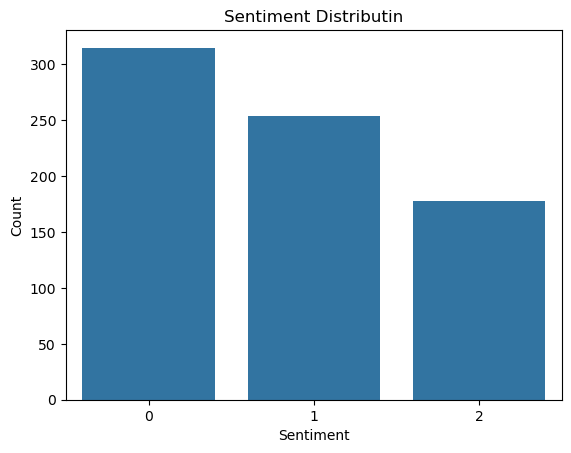

In [28]:
# Import necessary modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a copy of the df DataFrame
df1 = df.copy()

# Convert Timestamp to datetime
df1['Timestamp'] = pd.to_datetime(df1['Timestamp'])

# Plot 1: Sentiment Distribution
sns.countplot(x='Sentiment', data=df1)
plt.title('Sentiment Distributin')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

0---> Positive
1---> Negative
2---> Neutral

Stemming

Stemming is the process of reducing a words to its root word

In [32]:
port_stem=PorterStemmer()

In [34]:
def stemming(content):
  stemmed_content= re.sub('[^a-zA-Z]',' ',content)
  stemmed_content=stemmed_content.lower()
  stemmed_content=stemmed_content.split()
  stemmed_content=[port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
  stemmed_content=' '.join(stemmed_content)

  return stemmed_content

In [36]:
df['stemmed_content']=df['Text'].apply(stemming)

In [38]:
#Showing the stemmed content
df.head()

,Sno.,Text,Sentiment,Timestamp,User,Platform,stemmed_content
0,1,Enjoying a beautiful day at the park! ...,0,1/15/2023 12:30,User123,Twitter,enjoy beauti day park
1,2,Traffic was terrible this morning. ...,1,1/15/2023 8:45,CommuterX,Twitter,traffic terribl morn
2,3,Just finished an amazing workout! ðª ...,0,1/15/2023 15:45,FitnessFan,Instagram,finish amaz workout
3,4,Excited about the upcoming weekend getaway! ...,0,1/15/2023 18:20,AdventureX,Facebook,excit upcom weekend getaway
4,5,Trying out a new recipe for dinner tonight. ...,2,1/15/2023 19:55,ChefCook,Instagram,tri new recip dinner tonight


In [40]:
print(df['stemmed_content'])

0             enjoy beauti day park
1              traffic terribl morn
2               finish amaz workout
3       excit upcom weekend getaway
4      tri new recip dinner tonight
                   ...             
742                drift void empti
743             shatter echo regret
744               trap cycl despair
745                 blind dark soul
746            suffoc weight sorrow
Name: stemmed_content, Length: 747, dtype: object


In [42]:
print(df['Sentiment'])

0      0
1      1
2      0
3      0
4      2
      ..
742    1
743    1
744    1
745    1
746    1
Name: Sentiment, Length: 747, dtype: int64


In [44]:
#separating the data and label
X=df['stemmed_content'].values
Y=df['Sentiment'].values

Splitting the data to training data and test data

In [47]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2, stratify=Y,random_state=2)

In [49]:
print(X.shape, X_train.shape, X_test.shape)

(747,) (597,) (150,)


In [51]:
#Convertinng the textual data to numerical data

vectorizer= TfidfVectorizer()

X_train= vectorizer.fit_transform(X_train)
X_test= vectorizer.transform(X_test)

In [53]:
print(X_train)

  (0, 791)	0.24380944817696062
  (0, 1285)	0.2670826664208189
  (0, 886)	0.24705059562211124
  (0, 850)	0.6184712297721845
  (0, 1141)	0.3211654402536432
  (0, 1473)	0.2541895256324762
  (0, 1287)	0.2841080179378772
  (0, 1450)	0.35822286256940916
  (0, 390)	0.2210941051802207
  (1, 241)	0.28685291619174996
  (1, 621)	0.6011799025883142
  (1, 1006)	0.24309934531230162
  (1, 1009)	0.3005899512941571
  (1, 1299)	0.3005899512941571
  (1, 1152)	0.2481303890949894
  (1, 1077)	0.28685291619174996
  (1, 411)	0.3005899512941571
  (1, 11)	0.28685291619174996
  (2, 253)	0.3097337303643826
  (2, 1032)	0.2888281162154258
  (2, 1300)	0.24896276370037737
  (2, 422)	0.2888281162154258
  (2, 492)	0.2808801705874919
  (2, 585)	0.32456649965570417
  (2, 898)	0.3097337303643826
  :	:
  (592, 484)	0.2875902443326425
  (592, 1171)	0.32317545868198705
  (592, 777)	0.32317545868198705
  (592, 1197)	0.32317545868198705
  (593, 969)	0.35139746362765373
  (593, 39)	0.4371723933020056
  (593, 47)	0.4581080442004

In [55]:
print(X_test)

  (0, 59)	0.3104427676646397
  (0, 148)	0.3304386597946522
  (0, 238)	0.29625545641775014
  (0, 293)	0.28525092287747683
  (0, 416)	0.2762595642877376
  (0, 433)	0.3104427676646397
  (0, 462)	0.2620722530408481
  (0, 514)	0.21941409304917434
  (0, 561)	0.3304386597946522
  (0, 708)	0.24636740858319003
  (0, 721)	0.23812897970237118
  (0, 1176)	0.3304386597946522
  (1, 292)	0.3361345781701119
  (1, 462)	0.34375354682249976
  (1, 678)	0.3885907902399989
  (1, 849)	0.433428033657498
  (1, 868)	0.40719992762255447
  (1, 949)	0.3741564218866025
  (1, 1216)	0.35239122107538606
  (2, 62)	0.28453627741461096
  (2, 223)	0.3190595236385445
  (2, 775)	0.2564866442228701
  (2, 998)	0.3816324030542189
  (2, 1180)	0.30267422027424296
  (2, 1192)	0.717077230057065
  :	:
  (147, 458)	0.4750264008788941
  (147, 513)	0.4462810456084629
  (147, 523)	0.41006618089444197
  (147, 530)	0.4750264008788941
  (147, 1021)	0.42588589147018285
  (148, 190)	0.2547411333728805
  (148, 330)	0.3877625901705333
  (148,

Training the Machine Learning Model

Logistic Regression

In [59]:
model=LogisticRegression(max_iter=1000)

In [61]:
model.fit(X_train,Y_train)

LogisticRegression(max_iter=1000)

Model Evaluation

Accuracy Score

In [65]:
#accuracy score on the training data
X_train_prediction= model.predict(X_train)
training_data_accuracy=accuracy_score(Y_train,X_train_prediction)

In [67]:
print('Accuracy score on the training data:', training_data_accuracy)

Accuracy score on the training data: 0.9631490787269682


In [69]:
#accuracy score on the test data
X_test_prediction= model.predict(X_test)
test_data_accuracy=accuracy_score(Y_test,X_test_prediction)

In [71]:
print('Accuracy score on the test data:', test_data_accuracy)

Accuracy score on the test data: 0.8266666666666667


Confusion Matrix

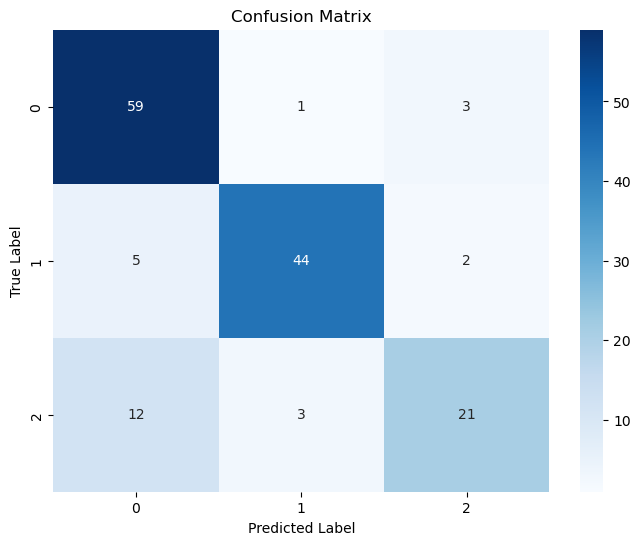

In [74]:
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
conf_matrix = confusion_matrix(Y_test, X_test_prediction)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


Classification Report: Print a classification report which includes precision, recall, F1-score, and support for each class (positive, negative, neutral).

In [77]:
from sklearn.metrics import classification_report

# Generate classification report
class_report = classification_report(Y_test, X_test_prediction)

# Print classification report
print("Classification Report:\n", class_report)


Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.94      0.85        63
           1       0.92      0.86      0.89        51
           2       0.81      0.58      0.68        36

    accuracy                           0.83       150
   macro avg       0.83      0.79      0.81       150
weighted avg       0.83      0.83      0.82       150



ROC Curve

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


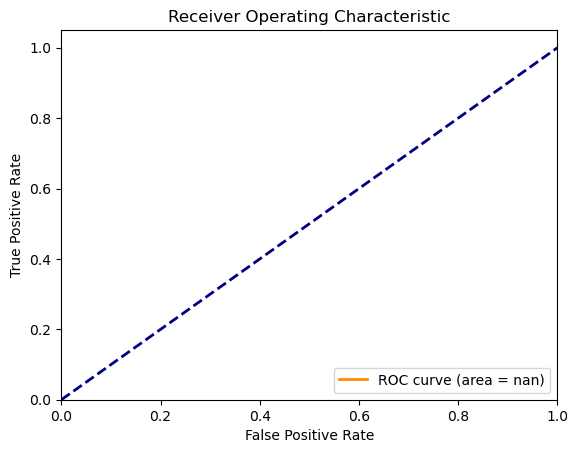

In [80]:
# Import necessary modules
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarize the target variable
Y_test_binarized = label_binarize(Y_test, classes=['0', '1'])

# Convert X_test_prediction to float
X_test_prediction = X_test_prediction.astype(float)

# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(Y_test_binarized[:, 1], X_test_prediction)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [82]:
sample_predictions = pd.DataFrame({ 'True_Sentiment': Y_test, 'Predicted_Sentiment': X_test_prediction})
print("\nSample Predictions:")
print(sample_predictions.head())


Sample Predictions:
   True_Sentiment  Predicted_Sentiment
0               0                  0.0
1               0                  0.0
2               2                  0.0
3               2                  2.0
4               2                  2.0


Correct vs. Incorrect Predictions

In [85]:
import pickle

In [87]:
filename= 'trained_model.sav'
pickle.dump(model,open(filename, 'wb'))

Using the saved model for future Prediction

In [94]:
#Loading the saved model
loaded_model= pickle.load(open('trained_model.sav', 'rb'))

In [111]:
X_new=X_test[3]
print(Y_test[3])

prediction=model.predict(X_new)
print(prediction)

if prediction[0] == '0':
  print("Positive")
elif prediction[0] == '1':
  print("Negative")
else:

  print("Neutral")

2
[2]
Neutral
